### Importation des librairies 

In [2]:
import pandas as pd  
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import fonction as fct

#### I- Chargement des datasets

Dans notre travail nous utiliserons le dataset  de marketing issue du git de JOSUE AFOUDA 

In [3]:
marketing_df= pd.read_csv('https://raw.githubusercontent.com/JosueAfouda/Marketing-Pandas/master/marketing.csv')
marketing_df.shape

(10037, 12)

In [4]:
marketing_df.head(3)

,user_id,date_served,marketing_channel,variant,converted,language_displayed,language_preferred,age_group,date_subscribed,date_canceled,subscribing_channel,is_retained
0,a100000029,1/1/18,House Ads,personalization,True,English,English,0-18 years,1/1/18,NaN,House Ads,True
1,a100000030,1/1/18,House Ads,personalization,True,English,English,19-24 years,1/1/18,NaN,House Ads,True
2,a100000031,1/1/18,House Ads,personalization,True,English,English,24-30 years,1/1/18,NaN,House Ads,True


In [43]:
marketing_df['variant'].unique()

array(['personalization', 'control'], dtype=object)

In [42]:
marketing_df.columns

Index(['user_id', 'date_served', 'marketing_channel', 'variant', 'converted',
       'language_displayed', 'language_preferred', 'age_group',
       'date_subscribed', 'date_canceled', 'subscribing_channel',
       'is_retained'],
      dtype='object')

In [5]:
marketing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10037 entries, 0 to 10036
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   user_id              10037 non-null  object
 1   date_served          10021 non-null  object
 2   marketing_channel    10022 non-null  object
 3   variant              10037 non-null  object
 4   converted            10022 non-null  object
 5   language_displayed   10037 non-null  object
 6   language_preferred   10037 non-null  object
 7   age_group            10037 non-null  object
 8   date_subscribed      1856 non-null   object
 9   date_canceled        577 non-null    object
 10  subscribing_channel  1856 non-null   object
 11  is_retained          1856 non-null   object
dtypes: object(12)
memory usage: 941.1+ KB


Puisque des variables  **date_served, date_subscribed et date_canceled** ne sont pas au format data nous allons les reformatés. 

In [6]:
##  R ecupération des variables de date
date_columns = [col for col in marketing_df.columns if 'date' in col.lower()]

## Reformatage des variables en type date
for col in date_columns:
   marketing_df[col]= pd.to_datetime(marketing_df[col])

## Verification 
print(marketing_df.dtypes)
#date_columns

user_id                        object
date_served            datetime64[ns]
marketing_channel              object
variant                        object
converted                      object
language_displayed             object
language_preferred             object
age_group                      object
date_subscribed        datetime64[ns]
date_canceled          datetime64[ns]
subscribing_channel            object
is_retained                    object
dtype: object


/tmp/ipykernel_23426/1669527672.py:6: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  marketing_df[col]= pd.to_datetime(marketing_df[col])
/tmp/ipykernel_23426/1669527672.py:6: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  marketing_df[col]= pd.to_datetime(marketing_df[col])
/tmp/ipykernel_23426/1669527672.py:6: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  marketing_df[col]= pd.to_datetime(marketing_df[col])


#### 1- Vérification des doublons et des valeurs  manquantes 

In [7]:
# Vérification des doublons (nous prenons "user" qui est l'identifiant unique)
print(f" Le nombre  de client en double de la base est  {marketing_df.duplicated('user_id', keep =False).sum()} ")
marketing_df.describe().T

 Le nombre  de client en double de la base est  5009 


,count,mean,min,25%,50%,75%,max
date_served,10021,2018-01-15 05:02:03.221235712,2018-01-01 00:00:00,2018-01-08 00:00:00,2018-01-15 00:00:00,2018-01-22 00:00:00,2018-01-31 00:00:00
date_subscribed,1856,2018-01-14 02:04:08.275862016,2018-01-01 00:00:00,2018-01-07 00:00:00,2018-01-15 00:00:00,2018-01-19 00:00:00,2018-01-31 00:00:00
date_canceled,577,2018-03-03 18:28:04.575389952,2018-01-05 00:00:00,2018-02-07 00:00:00,2018-03-04 00:00:00,2018-04-01 00:00:00,2018-05-09 00:00:00


**Id en double**

In [30]:
# Trouver les user_id en double
duplicated_user_ids = marketing_df[marketing_df.duplicated(subset='user_id', keep=False)]

print("User IDs en double :")
duplicated_user_ids.head()

User IDs en double :


,user_id,date_served,marketing_channel,variant,converted,language_displayed,language_preferred,age_group,date_subscribed,date_canceled,subscribing_channel,is_retained
21,a100000050,2018-01-02,House Ads,personalization,True,English,English,24-30 years,2018-01-02,NaT,House Ads,True
22,a100000050,2018-01-01,House Ads,personalization,False,English,English,24-30 years,2018-01-02,NaT,House Ads,True
23,a100000051,2018-01-02,House Ads,personalization,True,English,English,30-36 years,2018-01-02,NaT,House Ads,True
24,a100000051,2018-01-01,Push,personalization,False,English,English,30-36 years,2018-01-02,NaT,House Ads,True
25,a100000052,2018-01-02,House Ads,personalization,True,English,English,36-45 years,2018-01-02,NaT,House Ads,True


In [8]:
fct.tableau_valeurs_manquantes(marketing_df)


Votre dataframe a sélectionné a 12 colonnes.

Il y a 7 colonnes qui ont des valeurs manquantes.



,Valeurs Manquantes,% du Total des Valeurs
date_canceled,9460,94.3
date_subscribed,8181,81.5
subscribing_channel,8181,81.5
is_retained,8181,81.5
date_served,16,0.2
converted,15,0.1
marketing_channel,15,0.1


<Axes: >

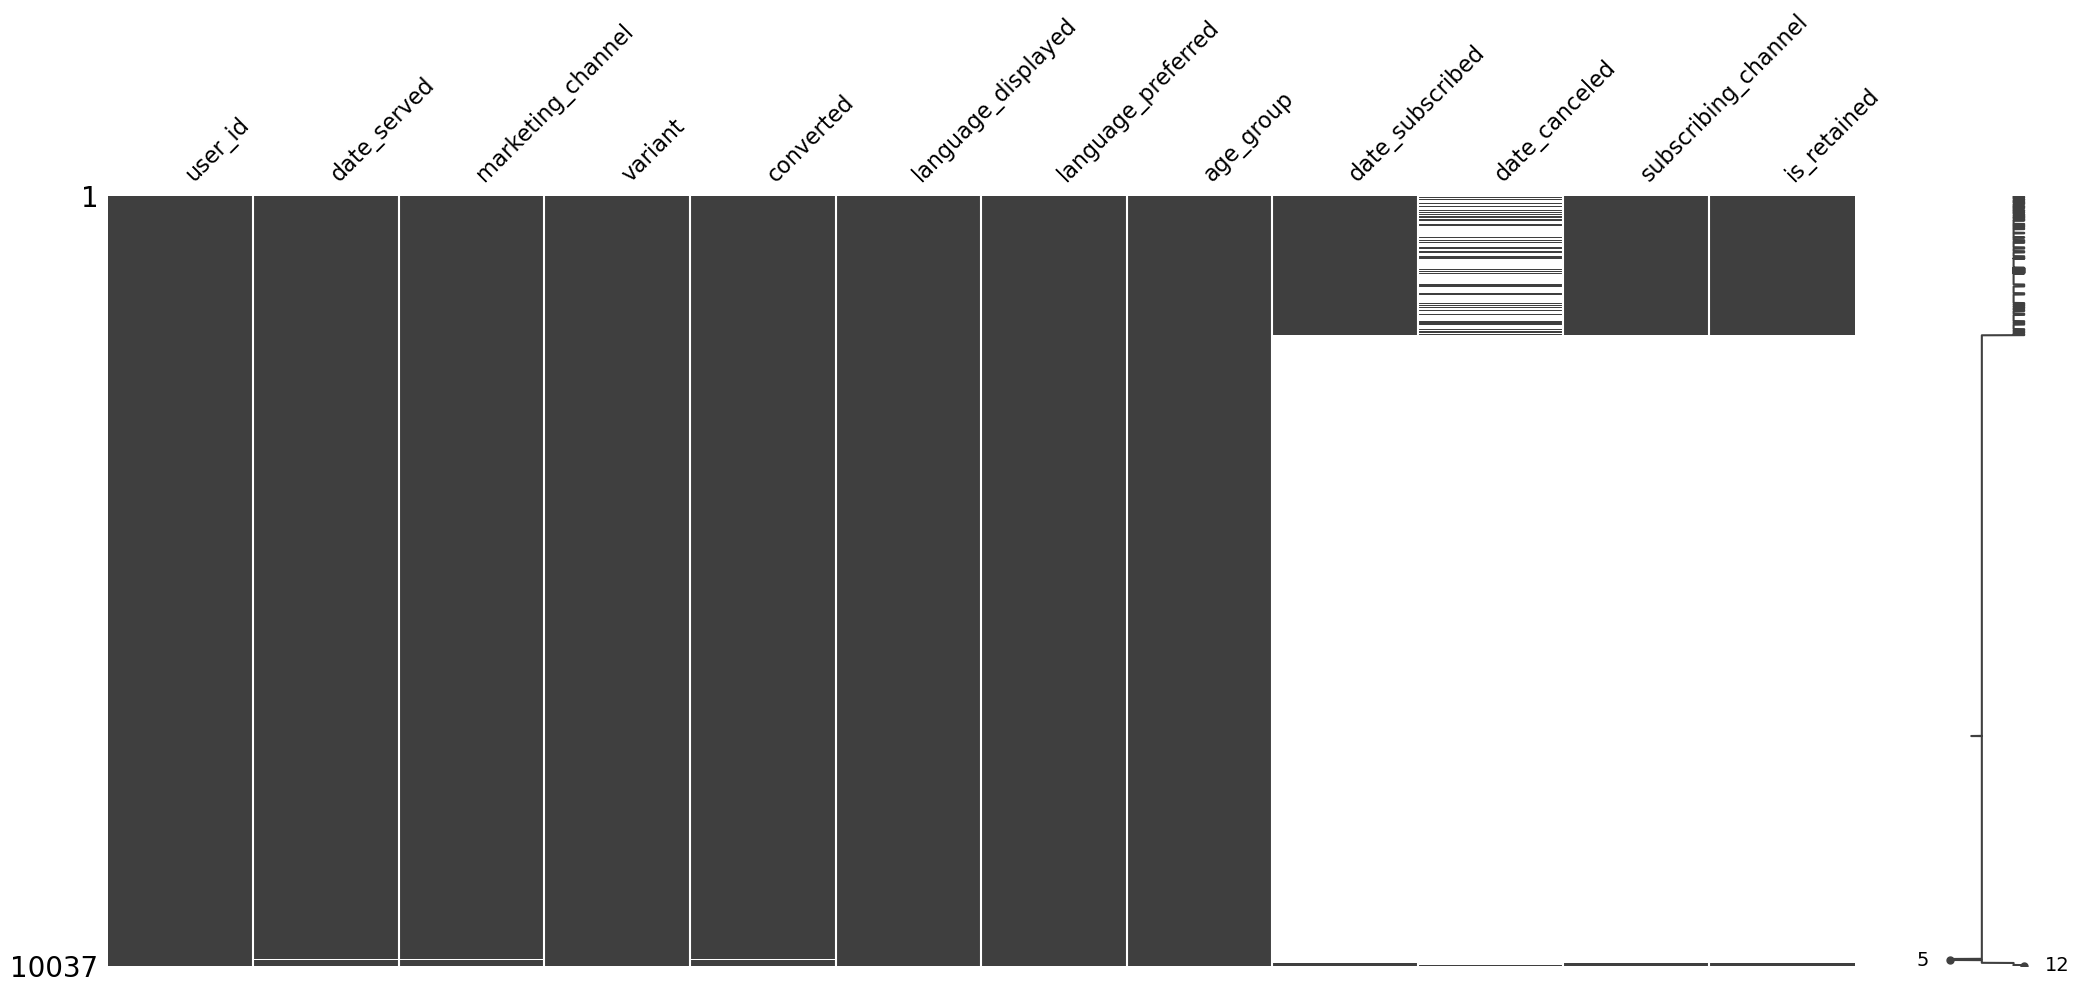

In [9]:
msno.matrix(marketing_df)

**Commentaires** 

-  Nous avons un jeu de données de  10037 observations, par le biais de l'identifiant des client **user_id** nous avons 7309 clients, dont certains font des commandes en doubles, 15 dates de livraisons manquantes, 
-  94.3% de date d'annulation; 81.5 de date_subscribed, .... 

##### 2- Analyse des habitudes de l'entreprise  

##### a- Canal Marketing 

In [10]:
marketing_df['marketing_channel'].unique()

array(['House Ads', 'Push', 'Facebook', 'Instagram', 'Email', nan],
      dtype=object)

In [11]:
# Appeler la fonction
distribution_df = fct.effectif_freq(marketing_df, "marketing_channel")

print(distribution_df)


    Modalité  Effectifs  Pourcentage
0  House Ads       4733        47.23
1  Instagram       1871        18.67
2   Facebook       1860        18.56
3       Push        993         9.91
4      Email        565         5.64


Près de 50%  des canaux de transmission du marketing se font par le biais des **House Ads** , suivie de instagram et facebook, avec chacun respectivement 18.67% et 18%.

<Figure size 700x700 with 0 Axes>

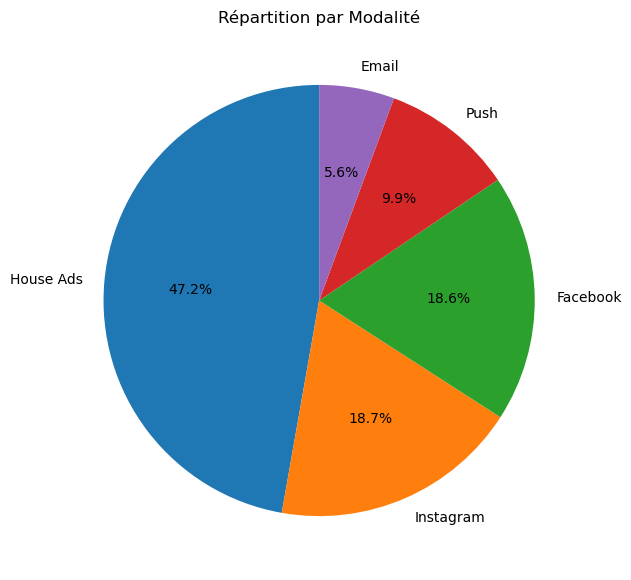

In [22]:
plt.figure(figsize=(7,7))
# Extraire les valeurs et les étiquettes
labels = distribution_df['Modalité']
sizes = distribution_df['Pourcentage']

# Tracer le graphique en secteurs
plt.figure(figsize=(7, 7))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title("Répartition par Modalité")
plt.show()

##### b- Utilisateur retenue pour la campagne marketing

Par la suite nous supprimer les doublons des utilisateurs avant de determiner le nombre de personnes retenus

In [ ]:
unique_users = marketing_df.drop_duplicates(subset='user_id', keep='first')

In [41]:
retained_dist = fct.effectif_freq(unique_users, "is_retained")
print (retained_dist['Effectifs'].loc[0], "sur 920 ont été retenus pour la campagne")
retained_dist

670 sur 920 ont été retenus pour la campagne


,Modalité,Effectifs,Pourcentage
0,True,670,65.69
1,False,350,34.31


1279 clients ont 

##### 3- Analyse des habitudes des clients 

In [49]:
#il s'agit ici  de comparer language_displayed à language_preferred
marketing_df['is_correct_lang']= np.where(
    marketing_df['language_displayed']==marketing_df['language_preferred'], 
            True,False)

##### a- Nombre d'utisateurs qui voient les annonces par jour

Nous allons regrouper les données par data_served , avant de determiner le nombre d'utilisateur qui visualise par jours 

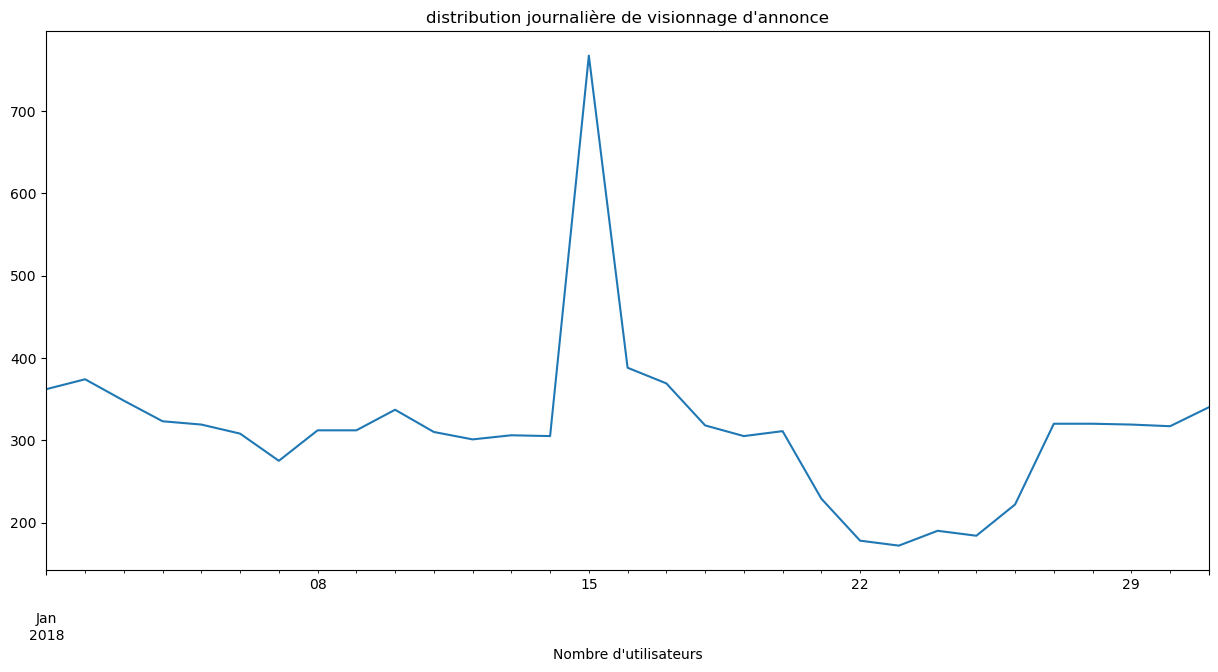

In [46]:
daily_users= marketing_df.groupby('date_served')['user_id'].nunique()

#Visualisation res resulats
plt.figure(figsize=(15, 7))
daily_users.plot.line()
plt.xlabel('Date')
plt.xlabel("Nombre d'utilisateurs")
plt.title("distribution journalière de visionnage d'annonce")
plt.show()

Avant le 15 janvier on constate qu'en moyenne  350 utulisateurs voient les annoncent chaque jours, mais le 15 janvier, on constate le nombre d'utilisateur double , passe de 350 à 750 avant de retrouver sa tendance habituelle juste après le et chuté à 170 en moyenne entre le 22 et le 26 jenvier